In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv("halloween_result.csv")
df1 = pd.read_csv("halloween_result1.csv")


In [41]:
df1.head()

,매수연도,매수일,매도일,매수종가,매도종가,수익률(%)
0,2001,2001-10-04,2002-05-02,2910.0,7590.0,160.82
1,2001,2001-10-04,2002-05-03,2910.0,7400.0,154.30
2,2001,2001-10-04,2002-05-06,2910.0,6960.0,139.18
3,2001,2001-10-04,2002-05-07,2910.0,7040.0,141.92
4,2001,2001-10-04,2002-05-08,2910.0,7250.0,149.14


In [10]:
# 연도별 평균 수익률 계산
avg_returns = df1.groupby("매수연도")["수익률(%)"].mean().round(2)

In [15]:
type(avg_returns)

pandas.core.series.Series

In [ ]:
avg_returns
avg_returns_df = avg_returns.reset_index()
avg_returns_df.columns = ['매수연도', '평균수익률(%)']
avg_returns_df['종목코드'] = '005930'

In [40]:
# avg_returns_df.set_index('매수연도')

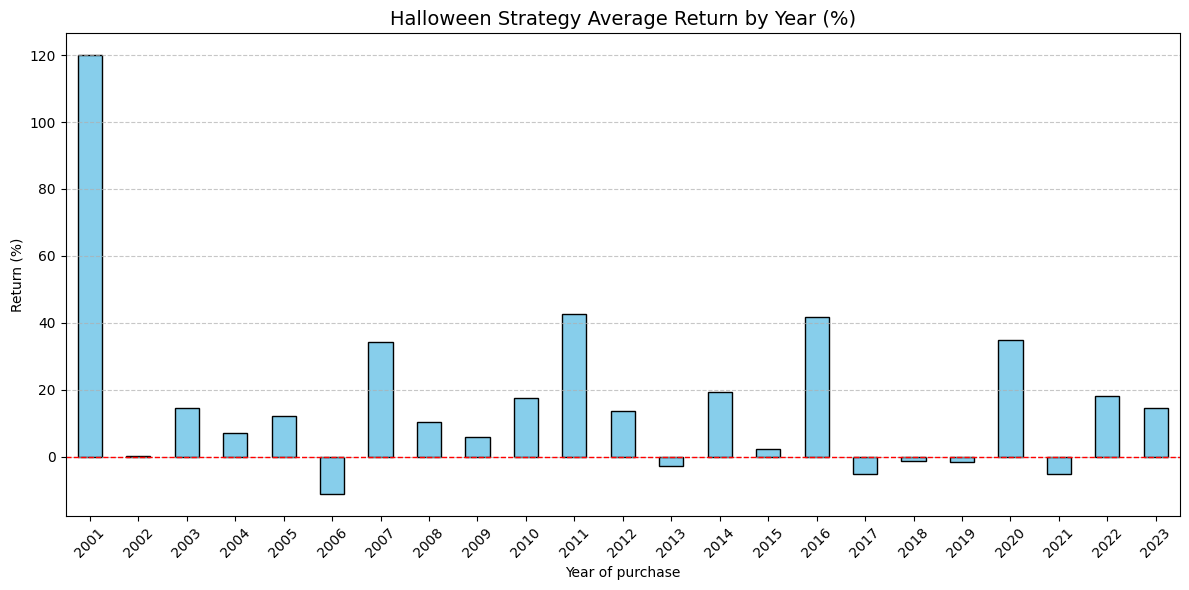

In [14]:
plt.figure(figsize=(12, 6))
avg_returns.plot(kind='bar', color='skyblue', edgecolor='black')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Halloween Strategy Average Return by Year (%)", fontsize=14)
plt.ylabel("Return (%)")
plt.xlabel("Year of purchase")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
df1.set_index('매수연도')

,매수일,매도일,매수종가,매도종가,수익률(%)
매수연도,,,,,
2001,2001-10-04,2002-05-02,2910.0,7590.0,160.82
2001,2001-10-04,2002-05-03,2910.0,7400.0,154.30
2001,2001-10-04,2002-05-06,2910.0,6960.0,139.18
2001,2001-10-04,2002-05-07,2910.0,7040.0,141.92
2001,2001-10-04,2002-05-08,2910.0,7250.0,149.14
...,...,...,...,...,...
2023,2023-10-31,2024-05-27,66900.0,77200.0,15.40
2023,2023-10-31,2024-05-28,66900.0,77600.0,15.99
2023,2023-10-31,2024-05-29,66900.0,75200.0,12.41


In [29]:
import pandas as pd

# 결과 CSV 불러오기
df = pd.read_csv("halloween_result.csv", parse_dates=["매수일", "매도일"])

worst_cases = []

for year in range(2001, 2024):
    # 해당 연도 10월 매수 + 다음 해 5월 매도 조합만 필터
    temp = df[
        (df['매수연도'] == year) &
        (df['매수일'].dt.month == 10) &
        (df['매도일'].dt.month == 5)
    ]

    if temp.empty:
        continue

    # 최악 수익률 하나 뽑기
    worst = temp.sort_values(by="수익률(%)").iloc[0]
    worst_cases.append({
        '매수연도': year,
        '매수일': worst['매수일'].date(),
        '매도일': worst['매도일'].date(),
        '매수종가': worst['매수종가'],
        '매도종가': worst['매도종가'],
        '최악의 수익률(%)': round(worst['수익률(%)'], 2)
    })

# 최종 DataFrame
df_worst = pd.DataFrame(worst_cases)
# print(df_worst)
df_worst.set_index("매수연도")


,매수일,매도일,매수종가,매도종가,최악의 수익률(%)
매수연도,,,,,
2001,2001-10-24,2002-05-10,3710.0,6680.0,80.05
2002,2002-10-28,2003-05-22,7220.0,6000.0,-16.90
2003,2003-10-30,2004-05-17,9420.0,9160.0,-2.76
2004,2004-10-06,2005-05-03,9890.0,9100.0,-7.99
2005,2005-10-04,2006-05-30,12040.0,12240.0,1.66
2006,2006-10-02,2007-05-30,13300.0,10640.0,-20.00
2007,2007-10-02,2008-05-26,11580.0,13580.0,17.27
2008,2008-10-14,2009-05-27,11200.0,10700.0,-4.46
2009,2009-10-01,2010-05-25,15840.0,14820.0,-6.44


In [39]:
df_return= pd.concat([avg_returns_df, df_worst], axis=1)
df_return.head()

,매수연도,수익률(%),종목코드,매수연도,매수일,매도일,매수종가,매도종가,최악의 수익률(%)
0,2001,119.97,005930,2001,2001-10-24,2002-05-10,3710.0,6680.0,80.05
1,2002,0.31,005930,2002,2002-10-28,2003-05-22,7220.0,6000.0,-16.90
2,2003,14.48,005930,2003,2003-10-30,2004-05-17,9420.0,9160.0,-2.76
3,2004,7.15,005930,2004,2004-10-06,2005-05-03,9890.0,9100.0,-7.99
4,2005,12.25,005930,2005,2005-10-04,2006-05-30,12040.0,12240.0,1.66


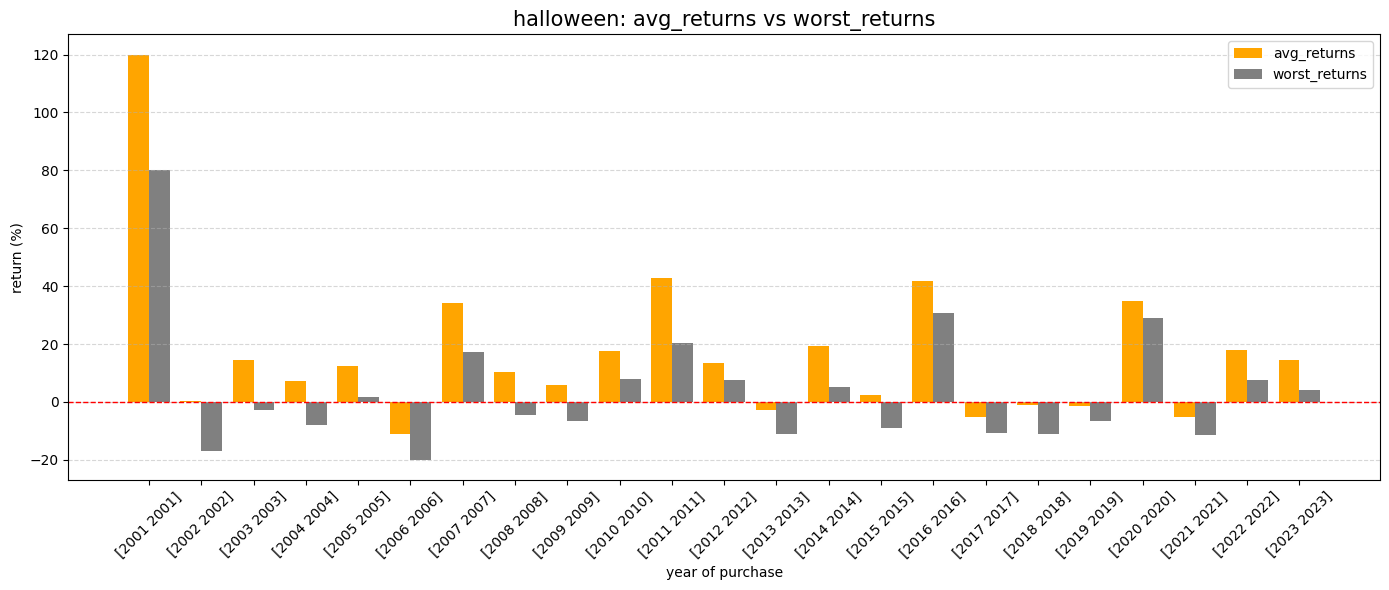

In [ ]:
# 예시 DataFrame (이미 df로 있다고 가정)
# df = pd.read_csv("your_result.csv")

# x축 값 (연도)
x = df_return['매수연도']
x_index = np.arange(len(x))  # 위치 index

# y축 값
avg_returns = df_return['수익률(%)']
worst_returns = df_return['최악의 수익률(%)']

# 막대 폭
bar_width = 0.4

plt.figure(figsize=(14, 6))

# 평균 수익률 막대 (왼쪽)
plt.bar(x_index - bar_width/2, avg_returns, width=bar_width, label='avg_returns', color='orange')

# 최악 수익률 막대 (오른쪽)
plt.bar(x_index + bar_width/2, worst_returns, width=bar_width, label='worst_returns', color='gray')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(x_index, x.values, rotation=45)
plt.title("halloween: avg_returns vs worst_returns", fontsize=15)
plt.xlabel("year of purchase")
plt.ylabel("return (%)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
df_kospi = pd.read_csv("halloween_index_result.csv")


avg_returns = (
    df_kospi
    .groupby(['market', '매수연도'])['수익률(%)']
    .mean()
    .round(2)
    .reset_index()
)
# avg_returns['종목코드'] = 'KS11'  # 지수 코드 추가

In [45]:
avg_returns

,market,매수연도,수익률(%)
0,KS11,2001,61.09
1,KS11,2002,-4.34
2,KS11,2003,5.71
3,KS11,2004,10.69
4,KS11,2005,16.69
5,KS11,2006,19.29
6,KS11,2007,-7.83
7,KS11,2008,18.53
8,KS11,2009,1.11
9,KS11,2010,12.30


In [50]:
df_kospi['매도일'] = pd.to_datetime(df_kospi['매도일'])
df_kospi['매수일'] = pd.to_datetime(df_kospi['매수일'])

In [51]:
# 5월 매도만 필터링
worst_cases = df_kospi[df_kospi['매도일'].dt.month == 5].copy()

# market + 매수연도 기준으로 최악 수익률 한 건씩 추출
worst_returns = (
    worst_cases
    .sort_values(by='수익률(%)')  # 수익률 오름차순
    .groupby(['market', '매수연도'])  # market 포함!
    .head(1)
    .reset_index(drop=True)
)

# 이름 정리
worst_returns = worst_returns.rename(columns={'수익률(%)': '최악의 수익률(%)'})

In [52]:
df_merged = pd.merge(avg_returns, worst_returns, on=['market', '매수연도'])


In [53]:
df_merged = df_merged[[
    'market', '매수연도', '수익률(%)', '매수일', '매수종가', '매도일', '매도종가', '최악의 수익률(%)'
]]
df_merged = df_merged.rename(columns={'market': '종목코드'})

In [54]:
df_ks11 = df_merged[df_merged['종목코드'] == 'KS11']
df_ks200 = df_merged[df_merged['종목코드'] == 'KS200']

In [58]:
df_ks200.set_index('매수연도')
df_ks11.set_index('매수연도')

,종목코드,수익률(%),매수일,매수종가,매도일,매도종가,최악의 수익률(%)
매수연도,,,,,,,
2001,KS11,61.09,2001-10-29,547.87,2002-05-31,796.40,45.36
2002,KS11,-4.34,2002-10-28,678.14,2003-05-22,595.38,-12.20
2003,KS11,5.71,2003-10-30,785.94,2004-05-17,728.98,-7.25
2004,KS11,10.69,2004-10-06,887.45,2005-05-03,913.82,2.97
2005,KS11,16.69,2005-10-11,1244.27,2006-05-25,1295.76,4.14
2006,KS11,19.29,2006-10-02,1374.22,2007-05-02,1553.30,13.03
2007,KS11,-7.83,2007-10-31,2064.85,2008-05-26,1800.58,-12.80
2008,KS11,18.53,2008-10-01,1439.67,2009-05-27,1362.02,-5.39
2009,KS11,1.11,2009-10-20,1659.15,2010-05-25,1560.83,-5.93


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\946864661.py:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\946864661.py:23: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\946864661.py:23: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


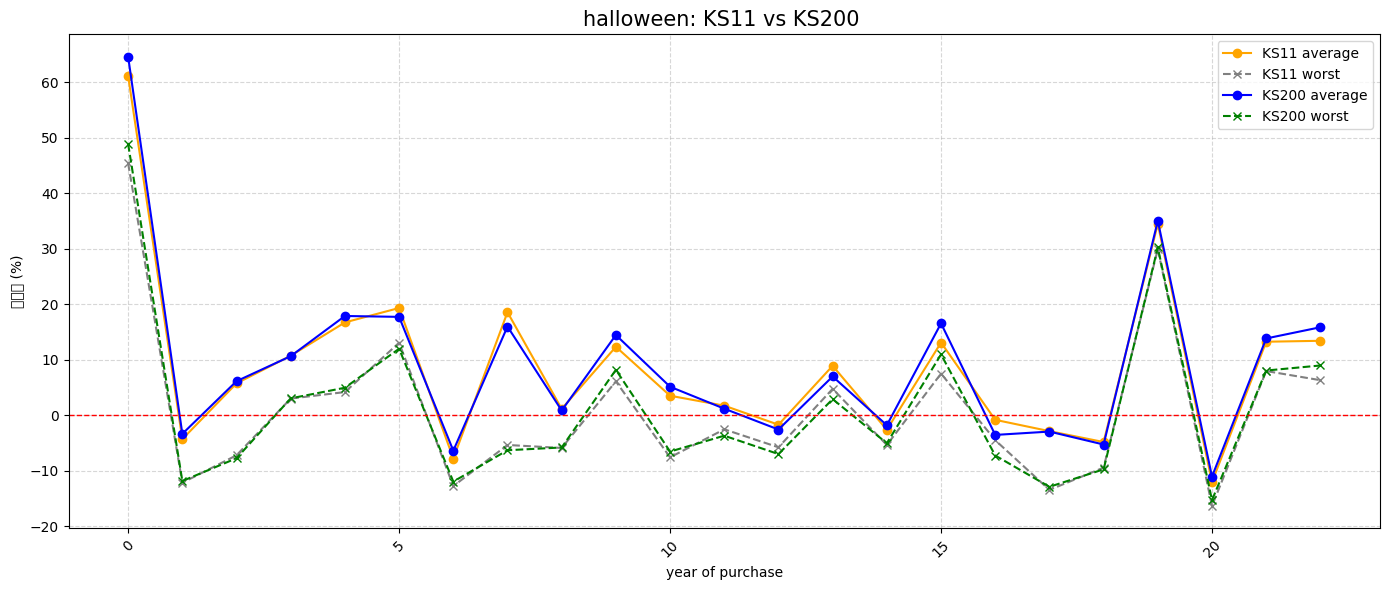

In [60]:
import matplotlib.pyplot as plt

# 공통 연도 인덱스
x = df_ks11.index

plt.figure(figsize=(14, 6))

# KS11
plt.plot(x, df_ks11['수익률(%)'], label='KS11 average', color='orange', marker='o')
plt.plot(x, df_ks11['최악의 수익률(%)'], label='KS11 worst', color='gray', linestyle='--', marker='x')

# KS200
plt.plot(x, df_ks200['수익률(%)'], label='KS200 average', color='blue', marker='o')
plt.plot(x, df_ks200['최악의 수익률(%)'], label='KS200 worst', color='green', linestyle='--', marker='x')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("halloween: KS11 vs KS200 ", fontsize=15)
plt.xlabel("year of purchase")
plt.ylabel("수익률 (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\1561703275.py:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\1561703275.py:20: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11848\1561703275.py:20: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Pyt

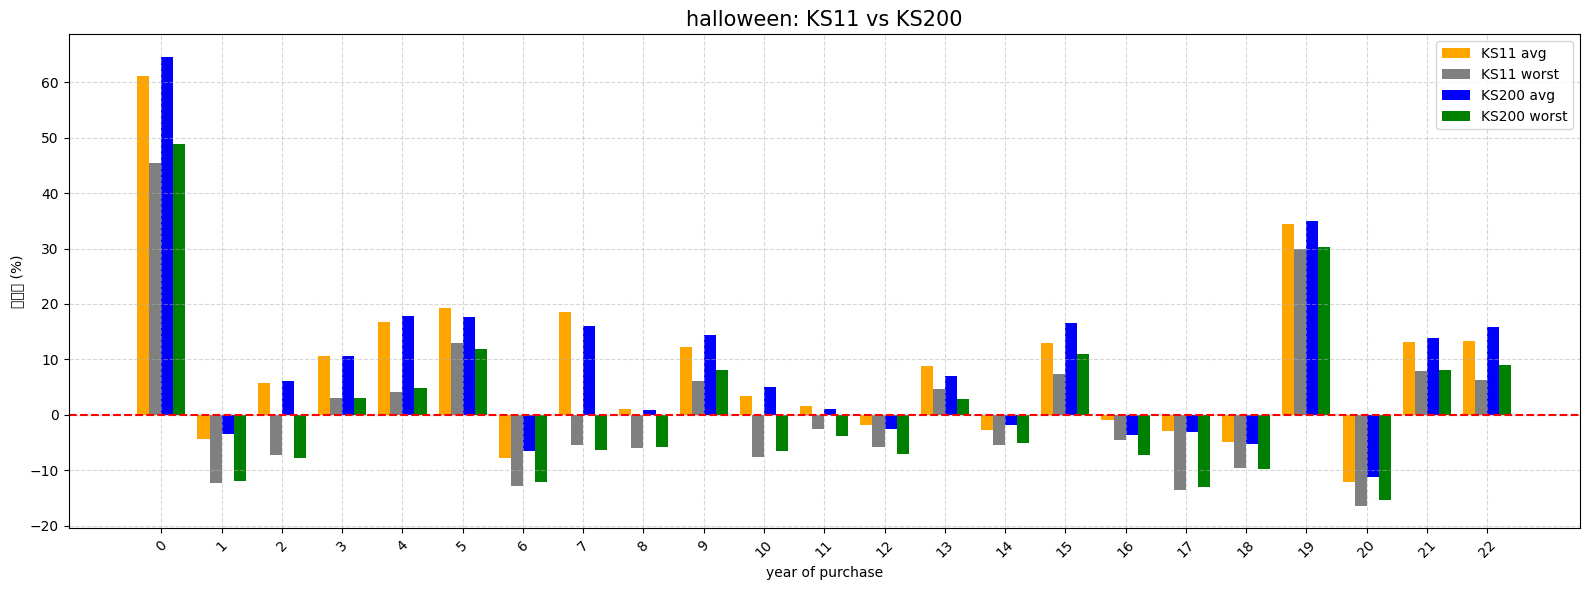

In [61]:
import numpy as np

years = df_ks11.index
x = np.arange(len(years))
bar_width = 0.2

plt.figure(figsize=(16, 6))
plt.bar(x - bar_width*1.5, df_ks11['수익률(%)'], width=bar_width, label='KS11 avg', color='orange')
plt.bar(x - bar_width*0.5, df_ks11['최악의 수익률(%)'], width=bar_width, label='KS11 worst', color='gray')
plt.bar(x + bar_width*0.5, df_ks200['수익률(%)'], width=bar_width, label='KS200 avg', color='blue')
plt.bar(x + bar_width*1.5, df_ks200['최악의 수익률(%)'], width=bar_width, label='KS200 worst', color='green')

plt.xticks(x, years, rotation=45)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("halloween: KS11 vs KS200", fontsize=15)
plt.xlabel("year of purchase")
plt.ylabel("수익률 (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
